In [1]:
#importing  modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mnist.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#getting label column vector from dataset
label = df['label']
df=df.drop('label',axis=1)

In [4]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

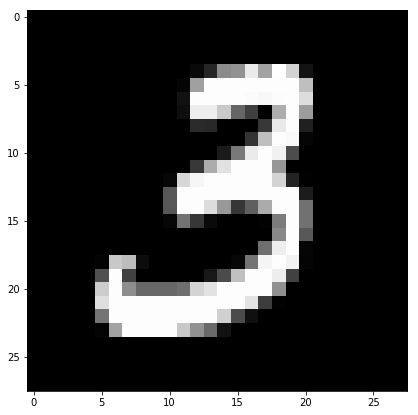

3


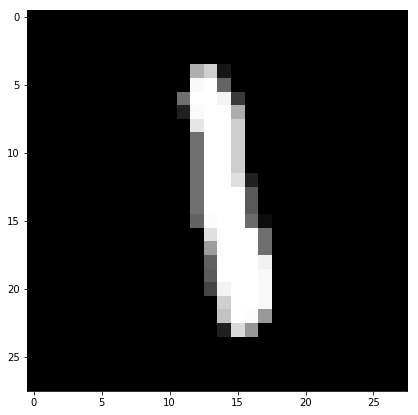

1


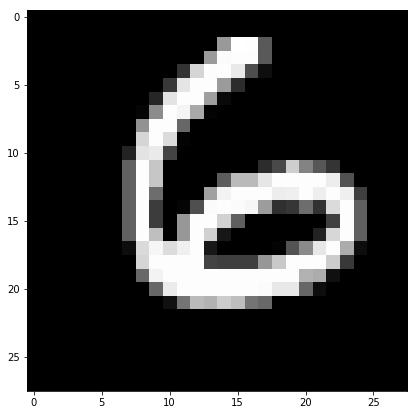

6


In [11]:
#Visualizing random 3 images from the dataset
for i in range(3):
    idx=(int)(np.random.random()*df.shape[0])+1
    plt.figure(figsize=(7,7))
    data_grid=df.iloc[idx].values.reshape(28,28)
    plt.imshow(data_grid,interpolation="none",cmap='gray')
    plt.show()
    print(label.iloc[idx])

## 2D visualization using PCA (Manual computation without built in PCA)

In [26]:
from sklearn.preprocessing import StandardScaler
df=df.astype(float)
std_data = StandardScaler().fit_transform(df)  # standardization of features
std_data.shape

(42000, 784)

In [27]:
covar_mat = std_data.T @ std_data # XT * X matrix multiplication to get covariance matrix since the matrix X i.e std_data is 
#standardized data mean for features will be zero and the std-dev of features will be 1
covar_mat.shape

(784, 784)

In [31]:
from scipy.linalg import eigh #importing 
values,vectors = eigh(covar_mat,eigvals=(covar_mat.shape[0]-2,covar_mat.shape[0]-1))#picking up top two eigen vectors and eigen values since they cover more spread
print(values.shape)
print(vectors.shape)
# vectors=vectors.T
# print(vectors.shape)

(2,)
(784, 2)


In [39]:
data_2d = df @ vectors
print(type(data_2d))
print(data_2d.shape) #dimentional reduction from 784 dims to 2 dims

<class 'pandas.core.frame.DataFrame'>
(42000, 2)


In [49]:
data_2d_with_label = pd.concat((data_2d,label),axis=1)#create data along with label
print(data_2d_with_label.head())
data=data_2d_with_label # creating alias for such a long name ;)
data.columns=['f1','f2','label']
data.head()

            0            1  label
0 -540.331669   122.904004      1
1  339.624235  2318.125463      0
2 -261.521516  -112.964529      1
3  304.388819   539.841540      4
4  300.353405  2734.887930      0


,f1,f2,label
0,-540.331669,122.904004,1
1,339.624235,2318.125463,0
2,-261.521516,-112.964529,1
3,304.388819,539.841540,4
4,300.353405,2734.887930,0


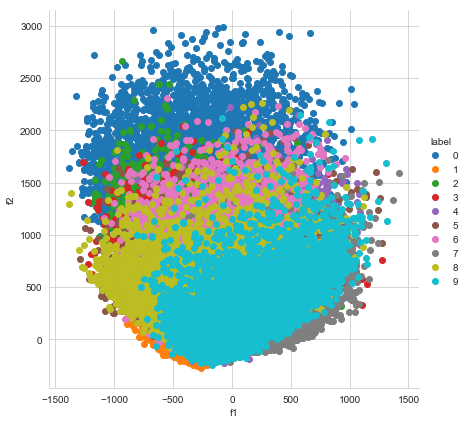

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='label',height=6).map(plt.scatter,'f1','f2').add_legend()
plt.show()